In [23]:
#ask1
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from sys import argv



def thresholding(input_image,output_image,threshold):
    img_in=np.array(Image.open(input_image))
    length=len(img_in)
    width=len(img_in[0])
    k=int(threshold)
    rgb=False
    
    if len(img_in.shape)>2:
        img_in=rgb2gray(img_in,length,width)
        rgb=True

    for i in range(0,length):
        for j in range(0,width):
            if img_in[i][j]>k:
                img_in[i][j]=255
            else:
                img_in[i][j]=0
    
    
    #If our picture was in rgb form we need to need to convert it as was
    #before after finishing thresholding

    if rgb :
        img_out=Image.fromarray(img_in).convert('RGB')
    else :
        img_out=Image.fromarray(img_in)
    img_out.save(output_image)

    plt.imshow(img_in,cmap="gray")
    plt.title("Threshold=%d" %k)
    plt.show()


#convert an rgb image into a grayscale image using the median of the RGB value
def rgb2gray(input_image_array,length,width):
    output_array=np.zeros((length,width),dtype=np.int)

    for i in range(0,length):
        for j in range(0,width):
            median_rgb=0
            for k in range(0,3):
                median_rgb+=input_image_array[i][j][k]
            median_rgb=median_rgb/3
            output_array[i][j]=median_rgb

    return output_array    


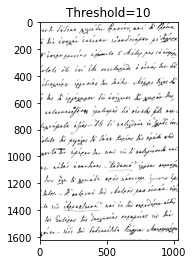

In [24]:
thresholding("trikoupi6.png","output.png",10)

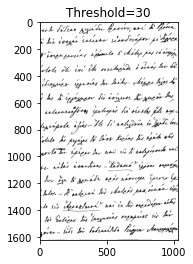

In [25]:
thresholding("trikoupi6.png","output.png",30)

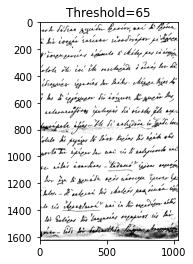

In [26]:
thresholding("trikoupi6.png","output.png",65)

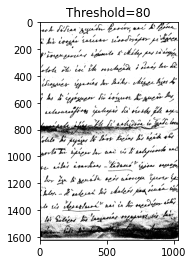

In [27]:
thresholding("trikoupi6.png","output.png",80)

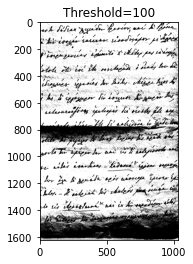

In [28]:
thresholding("trikoupi6.png","output.png",100)

In [29]:
#ask2
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from sys import argv
import math

#Nearest neighbor interpolation is not completed



def affine_transform(t_affine,input_image,output_image):
    #open input image
    img_in=np.array(Image.open(input_image))
    height=len(img_in)
    width=len(img_in[0])

    img_out=np.zeros((height,width),dtype=np.int)
    
    #We use the offset variables so that i can move the center(0,0) of the image  
    x_offset=math.floor(width/2)
    y_offset=math.floor(height/2)

    for i in range(height):
        for j in range(width):
            # transform thecoordinates of the pixel so that we can 
            #have the (0,0) point int the center of the image
            x_old=j-x_offset
            y_old=y_offset-i

            x_new=int(t_affine[0][0]*x_old+t_affine[0][1]*y_old+t_affine[0][2])
            y_new=int(t_affine[1][0]*x_old+t_affine[1][1]*y_old+t_affine[1][2])
            
            #if the new coordinates of a point are outside the new image then continue
            if abs(int(y_new-y_offset)) >=height or abs(int(x_new+x_offset))>=width:
                continue
            
            #we do the reverse transform to read the pixels from img
            img_out[abs(int(y_new-y_offset))][abs(int(x_new+x_offset))]=img_in[abs(int(y_old-y_offset))][abs(int(x_old+x_offset))]
    
    plt.imshow(img_out,cmap="gray")
    plt.show()



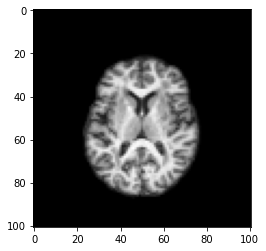

In [30]:
t_affine=np.zeros((3,3))
t_affine[0][0]=0
t_affine[0][1]=-1
t_affine[0][2]=0
t_affine[1][0]=1
t_affine[1][1]=0
t_affine[1][2]=0
t_affine[2][2]=1

affine_transform(t_affine,"brain0030slice150_101x101.png","save.png")

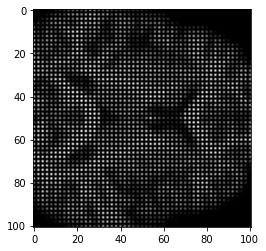

In [31]:
t_affine=np.zeros((3,3))
t_affine[0][0]=2
t_affine[0][1]=0
t_affine[0][2]=0
t_affine[1][0]=0
t_affine[1][1]=2
t_affine[1][2]=0
t_affine[2][2]=1

affine_transform(t_affine,"brain0030slice150_101x101.png","save.png")

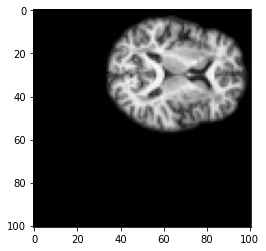

In [34]:
t_affine=np.zeros((3,3))
t_affine[0][0]=1
t_affine[0][1]=0
t_affine[0][2]=20
t_affine[1][0]=0
t_affine[1][1]=1
t_affine[1][2]=20
t_affine[2][2]=1

affine_transform(t_affine,"brain0030slice150_101x101.png","save.png")